In [1]:
import sympy as sp
import numpy as np
sp.init_printing()

In [2]:
# This code is needed to lambdify expressions named with latex symbols
# it removes the backslashes and curly braces upon before code generation.
from sympy.utilities.codegen import codegen
import re
def _print_Symbol(self, expr):
    CodePrinter = sp.printing.codeprinter.CodePrinter
    name = super(CodePrinter, self)._print_Symbol(expr)
    return re.sub(r'[\{^}]','_',re.sub(r'[\\\{\}]', '', name))
sp.printing.codeprinter.CodePrinter._print_Symbol = _print_Symbol

def ccode(cfun_name, sp_expr, cfile):
    '''Generate c function cfun_name for expr and directive name cfile 
    '''
    return codegen((cfun_name, sp_expr), 'C89', cfile + '_' + cfun_name)

In [3]:
n_D = sp.Symbol('n_D', integer=True)
eps = sp.MatrixSymbol(r'\boldsymbol{\varepsilon}',n_D,n_D)
sig = sp.MatrixSymbol(r'\boldsymbol{\sigma}',n_D,n_D)
from sympy.abc import i,j,k,l,N

In [4]:
sig @ eps

In [5]:
sig2D_ = sig.subs(n_D,2)

In [6]:
I_1_ = sp.Sum(sig2D_[i,i],(i,0,1))
get_I_1 = sp.lambdify(sig2D_, I_1_, 'numpy')

In [7]:
sig2d_val = np.array([[1,2],[2,3]])
get_I_1(sig2d_val)

4

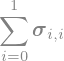

In [8]:
I_1_

In [43]:
s, K = sp.symbols('s, K')
get_sK = sp.lambdify((s, K), sp.Matrix([s,0, K]), modules='numpy')

In [42]:
get_sK(np.array([1,2], dtype=np.float_),3)

array([[array([1., 2.])],
       [0],
       [3]], dtype=object)